In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/strong_scale_data_16.xlsx')

Mounted at /content/drive


In [3]:
df


,Nodes,Cores,SCALE,graph_generation RMAT non-agl,construction_time Cyclic non-agl,bfs mean_time Cyclic non-agl,bfs harmonic_mean_TEPS Cyclic non-agl,graph_generation Uniform,graph_generation RMAT,construction_time Cyclic,...,bfs harmonic_mean_TEPS SnakeHashRotation,Average load on PE SnakeHashRotation,Variance load on PE SnakeHashRotation,Highest deviation from Average SnakeHashRotation,construction_time SnakeRotationFlipping,bfs mean_time SnakeRotationFlipping,bfs harmonic_mean_TEPS SnakeRotationFlipping,Average load on PE SnakeRotationFlipping,Variance load on PE SnakeRotationFlipping,Highest deviation from Average SnakeRotationFlipping
0,1,16,24,9.796243,4.730376,1.492830,179817000,1.459548,7.183690,21.568430,...,52602700,3.355410e+07,2.739823e+14,3.979706e+07,9.026187,4.770210,56273300,3.355410e+07,1.227611e+14,3.073129e+07
1,2,32,24,4.921333,2.064392,1.075740,249535000,0.730658,3.612554,16.682969,...,73065300,1.677705e+07,8.468831e+13,2.614064e+07,5.737842,3.337130,80439000,1.677705e+07,4.125312e+13,2.121217e+07
2,4,64,24,4.912525,1.351641,0.566683,473696000,0.366716,1.753751,10.707520,...,124909000,8.388523e+06,2.538637e+13,1.659726e+07,2.846472,1.841080,145804000,8.388523e+06,1.316720e+13,1.401602e+07
3,8,128,24,4.905906,1.009846,0.292198,918678000,0.187738,0.878528,7.153307,...,214348000,4.194261e+06,7.447728e+12,1.030512e+07,1.436942,1.132650,236997000,4.194261e+06,4.047733e+12,8.994682e+06
4,16,256,24,4.925072,0.806564,0.178027,1507830000,0.094166,0.442286,4.389389,...,460586000,2.097130e+06,2.148531e+12,6.307203e+06,0.756746,0.530172,506318000,2.097130e+06,1.210651e+12,5.665925e+06
5,32,512,24,4.897907,0.771226,0.119035,2255090000,0.051552,0.221755,2.997731,...,564311000,1.048565e+06,6.123801e+11,3.816626e+06,0.396246,0.424005,633095000,1.048565e+06,3.550760e+11,3.521283e+06


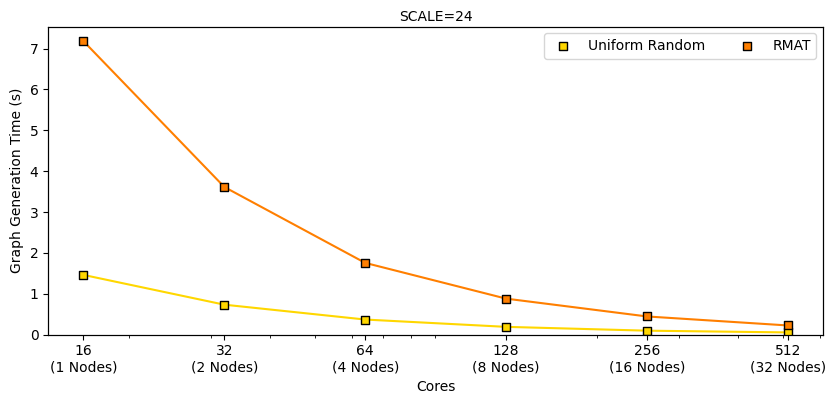

In [5]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['graph_generation Uniform'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['graph_generation RMAT'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
plt.plot(df['Cores'], df['graph_generation Uniform'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['graph_generation RMAT'], c = colors[1],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Generation Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SCALE=24")

i = 0
metrics = ['Uniform Random', 'RMAT']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper right')
    i += 1
plt.savefig("PACE_strong_scaling")

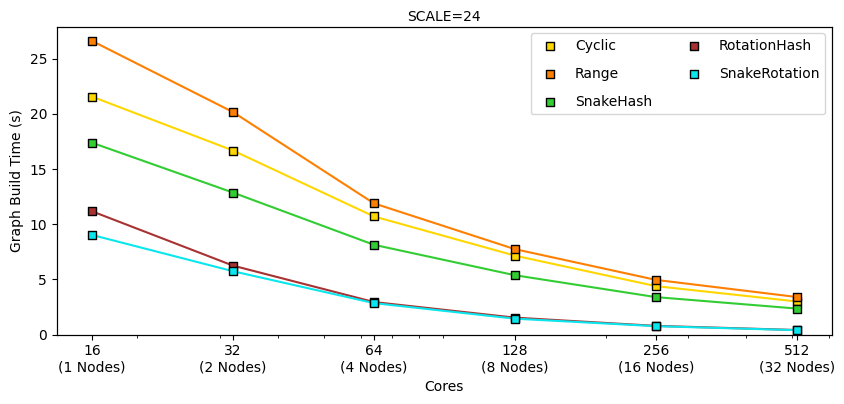

In [7]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['construction_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['construction_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
plt.plot(df['Cores'], df['construction_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['construction_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeRotationFlipping'], c = colors[4],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Build Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SCALE=24")

i = 0
metrics = ['Cyclic', 'Range', 'SnakeHash', 'RotationHash', 'SnakeRotation',]
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper right')
    i += 1
plt.savefig("PACE_strong_scaling")

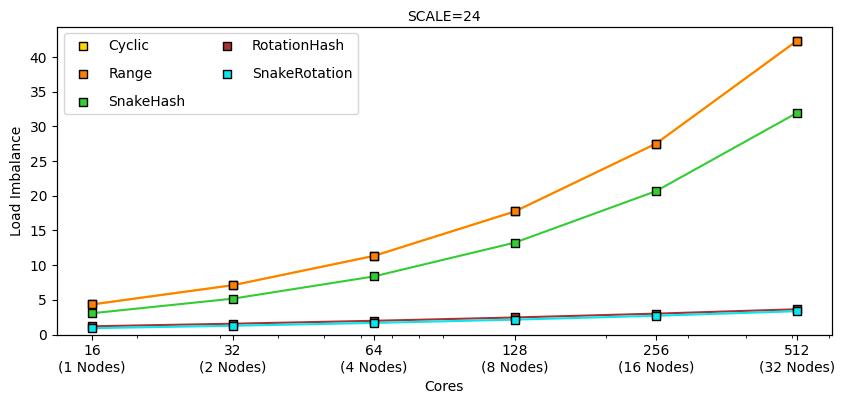

In [8]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

df['(Highest deviation from Average)/(Average Load) Cyclic'] = df['Highest deviation from Average Cyclic']/df['Average load on PE Cyclic']
df['(Highest deviation from Average)/(Average Load) Range'] = df['Highest deviation from Average Range']/df['Average load on PE Range']
df['(Highest deviation from Average)/(Average Load) SnakeHashFlipping'] = df['Highest deviation from Average SnakeHashFlipping']/df['Average load on PE SnakeHashFlipping']
df['(Highest deviation from Average)/(Average Load) SnakeHashRotation'] = df['Highest deviation from Average SnakeHashRotation']/df['Average load on PE SnakeHashRotation']
df['(Highest deviation from Average)/(Average Load) SnakeRotationFlipping'] = df['Highest deviation from Average SnakeRotationFlipping']/df['Average load on PE SnakeRotationFlipping']


for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) SnakeRotationFlipping'], c = colors[4],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Load Imbalance')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SCALE=24")

i = 0
metrics = ['Cyclic', 'Range', 'SnakeHash', 'RotationHash', 'SnakeRotation',]
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")

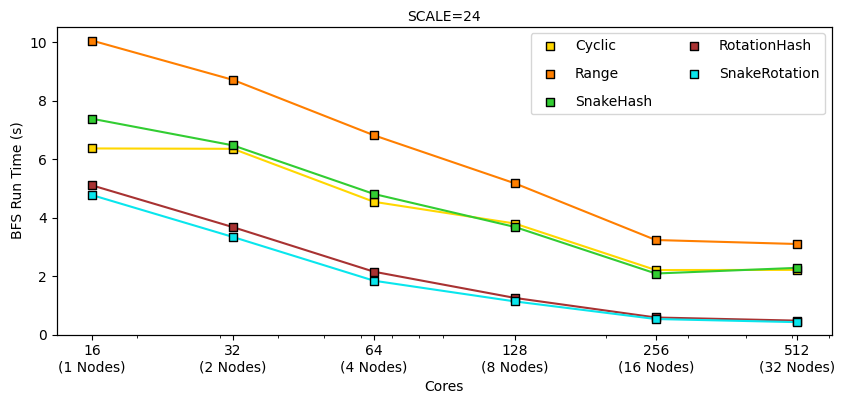

In [9]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['bfs mean_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
plt.plot(df['Cores'], df['bfs mean_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeRotationFlipping'], c = colors[4],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('BFS Run Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SCALE=24")

i = 0
metrics = ['Cyclic', 'Range', 'SnakeHash', 'RotationHash', 'SnakeRotation',]
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper right')
    i += 1
plt.savefig("PACE_strong_scaling")

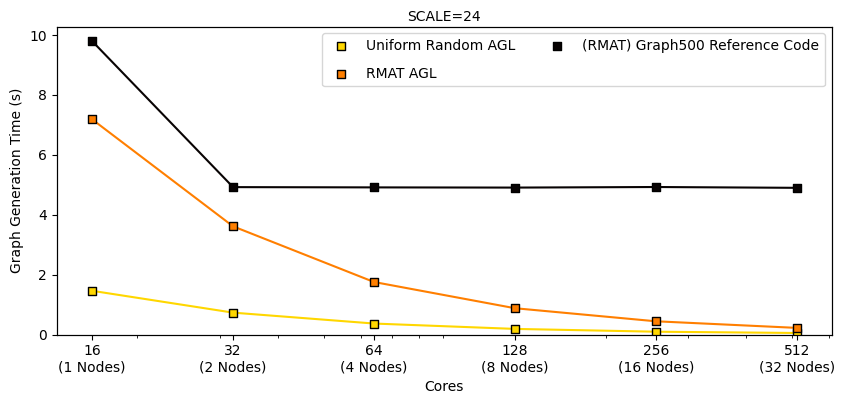

In [10]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['graph_generation Uniform'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['graph_generation RMAT'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['graph_generation RMAT non-agl'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
plt.plot(df['Cores'], df['graph_generation Uniform'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['graph_generation RMAT'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['graph_generation RMAT non-agl'], c = colors[2],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Generation Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SCALE=24")

i = 0
metrics = ['Uniform Random AGL', 'RMAT AGL', '(RMAT) Graph500 Reference Code']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper right')
    i += 1
plt.savefig("PACE_strong_scaling")

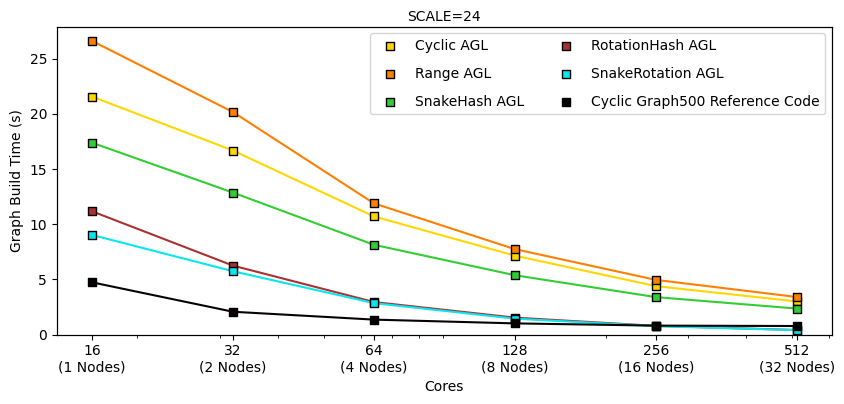

In [11]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['construction_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['construction_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
    plt.scatter(row['Cores'], row['construction_time Cyclic non-agl'],  marker = markers[1], edgecolors = 'black', c = colors[5],zorder=2)
plt.plot(df['Cores'], df['construction_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['construction_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeRotationFlipping'], c = colors[4],zorder=1)
plt.plot(df['Cores'], df['construction_time Cyclic non-agl'], c = colors[5],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Build Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SCALE=24")

i = 0
metrics = ['Cyclic AGL', 'Range AGL', 'SnakeHash AGL', 'RotationHash AGL', 'SnakeRotation AGL', 'Cyclic Graph500 Reference Code']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper right')
    i += 1
plt.savefig("PACE_strong_scaling")

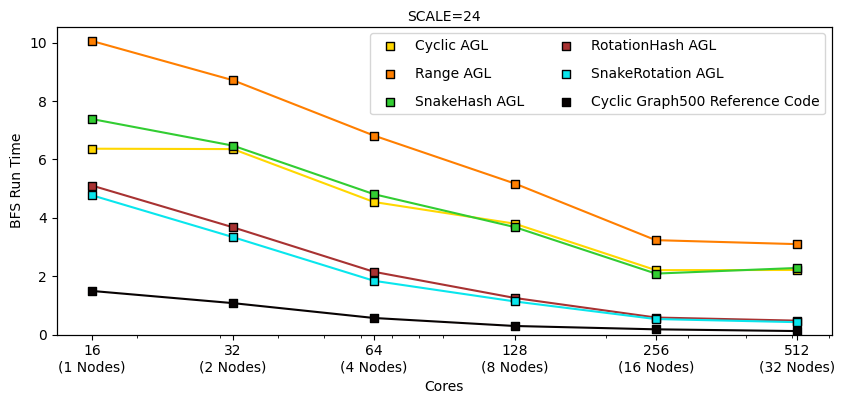

In [31]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['bfs mean_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time Cyclic non-agl'],  marker = markers[1], edgecolors = 'black', c = colors[5],zorder=2)
plt.plot(df['Cores'], df['bfs mean_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeRotationFlipping'], c = colors[4],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time Cyclic non-agl'], c = colors[5],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('BFS Run Time')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SCALE=24")

i = 0
metrics = ['Cyclic AGL', 'Range AGL', 'SnakeHash AGL', 'RotationHash AGL', 'SnakeRotation AGL', 'Cyclic Graph500 Reference Code']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper right')
    i += 1
plt.savefig("PACE_strong_scaling")

In [2]:
# Define the vertex-to-PE allocation
cyclic_allocation = {
    'Vertex': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'PE': [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
}
Range_allocation = {
    'Vertex': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'PE': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
}
SnakeHashFlipping_allocation = {
    'Vertex': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'PE': [0, 1, 2, 3, 3, 2, 1, 0, 0, 1, 2, 3, 3, 2, 1, 0]
}
SnakeHashRotation_allocation = {
    'Vertex': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'PE': [0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]
}
SnakeRotationFlipping_allocation = {
    'Vertex': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'PE': [0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 3, 0, 2, 1, 0, 3]
}

# Create a DataFrame
df_cyclic_allocation = pd.DataFrame(cyclic_allocation)
df_Range_allocation = pd.DataFrame(Range_allocation)
df_SnakeHashFlipping_allocation = pd.DataFrame(SnakeHashFlipping_allocation)
df_SnakeHashRotation_allocation = pd.DataFrame(SnakeHashRotation_allocation)
df_SnakeRotationFlipping_allocation = pd.DataFrame(SnakeRotationFlipping_allocation)

# # Print the DataFrame
# print(df)

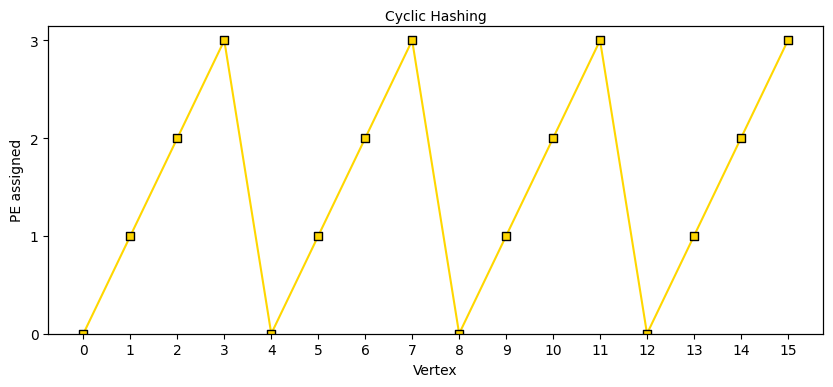

In [45]:
markers = ['o', 's']
colors = ['#FFD700']
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
# ax.set_xscale('log')
i = 0

for index, row in df_cyclic_allocation.iterrows():
    plt.scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
plt.plot(df_cyclic_allocation['Vertex'], df_cyclic_allocation['PE'], c = colors[0],zorder=1)
ax.set_xticks(list(df_cyclic_allocation['Vertex']))
ax.set_yticks([0, 1, 2, 3])
# ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Vertex")
plt.ylabel('PE assigned')

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"Cyclic Hashing")

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

plt.savefig("PACE_strong_scaling")

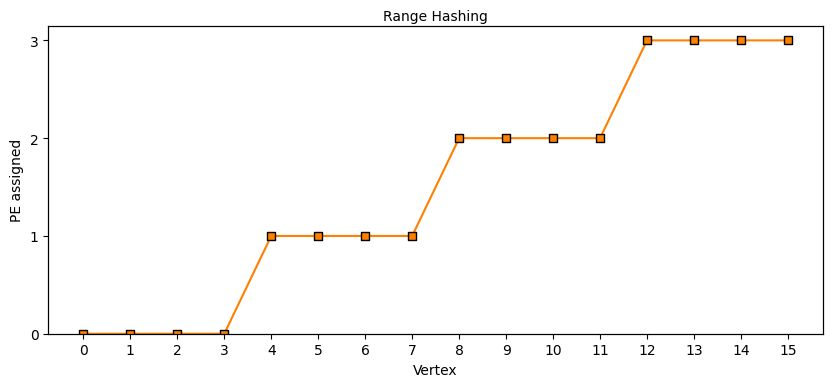

In [50]:
markers = ['o', 's']
colors = ['#FF7F00',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
# ax.set_xscale('log')
i = 0

for index, row in df_Range_allocation.iterrows():
    plt.scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
plt.plot(df_Range_allocation['Vertex'], df_Range_allocation['PE'], c = colors[0],zorder=1)
ax.set_xticks(list(df_Range_allocation['Vertex']))
ax.set_yticks([0, 1, 2, 3])
# ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Vertex")
plt.ylabel('PE assigned')

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"Range Hashing")

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

plt.savefig("PACE_strong_scaling")

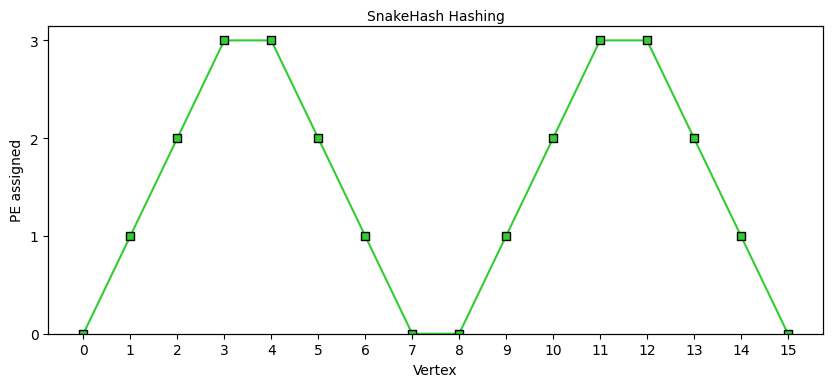

In [14]:
markers = ['o', 's']
colors = ['#32CD32']
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
# ax.set_xscale('log')
i = 0

for index, row in df_SnakeHashFlipping_allocation.iterrows():
    plt.scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
plt.plot(df_SnakeHashFlipping_allocation['Vertex'], df_SnakeHashFlipping_allocation['PE'], c = colors[0],zorder=1)
ax.set_xticks(list(df_SnakeHashFlipping_allocation['Vertex']))
ax.set_yticks([0, 1, 2, 3])
# ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Vertex")
plt.ylabel('PE assigned')

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"SnakeHash Hashing")

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

plt.savefig("PACE_strong_scaling")

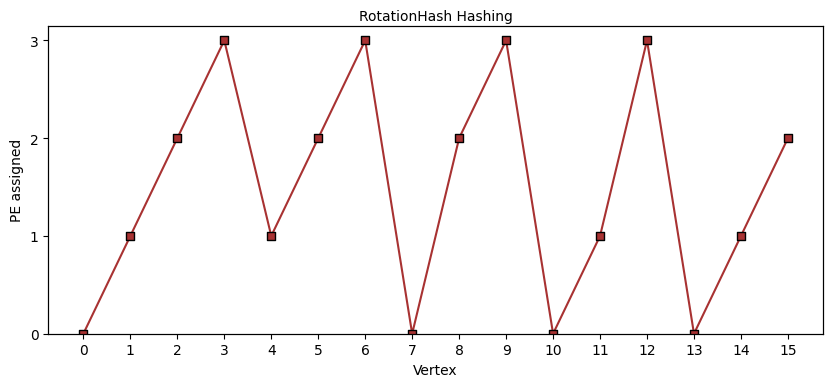

In [15]:
markers = ['o', 's']
colors = ['#a83232',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
# ax.set_xscale('log')
i = 0

for index, row in df_SnakeHashRotation_allocation.iterrows():
    plt.scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
plt.plot(df_SnakeHashRotation_allocation['Vertex'], df_SnakeHashRotation_allocation['PE'], c = colors[0],zorder=1)
ax.set_xticks(list(df_SnakeHashRotation_allocation['Vertex']))
ax.set_yticks([0, 1, 2, 3])
# ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Vertex")
plt.ylabel('PE assigned')

ax3 = ax.twiny()
ax3.set_xticks([])
ax3.set_xlabel(r"RotationHash Hashing")

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

plt.savefig("PACE_strong_scaling")

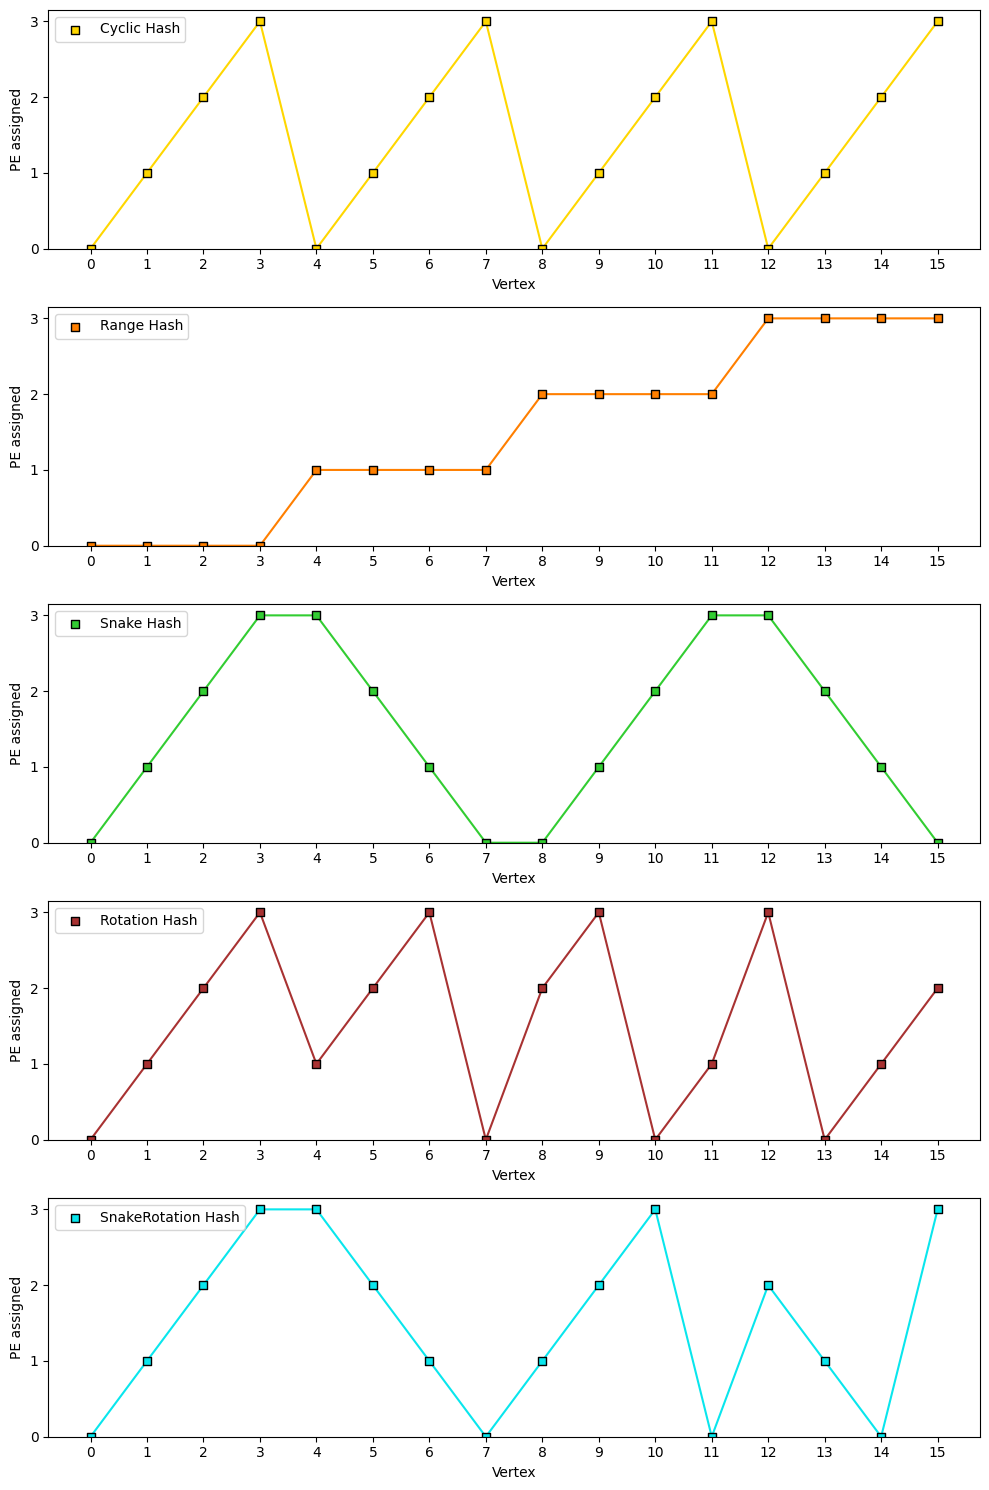

In [4]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
fig, ax = plt.subplots(5, 1, figsize=(10,15))

for index, row in df_cyclic_allocation.iterrows():
    ax[0].scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
ax[0].plot(df_cyclic_allocation['Vertex'], df_cyclic_allocation['PE'], c = colors[0],zorder=1)
ax[0].set_xticks(list(df_cyclic_allocation['Vertex']))
ax[0].set_yticks([0, 1, 2, 3])
ax[0].set_xlabel(r"Vertex")
ax[0].set_ylim(bottom=0)
ax[0].set_ylabel('PE assigned')

for index, row in df_Range_allocation.iterrows():
    ax[1].scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
ax[1].plot(df_Range_allocation['Vertex'], df_Range_allocation['PE'], c = colors[1],zorder=1)
ax[1].set_xticks(list(df_Range_allocation['Vertex']))
ax[1].set_yticks([0, 1, 2, 3])
ax[1].set_xlabel(r"Vertex")
ax[1].set_ylim(bottom=0)
ax[1].set_ylabel('PE assigned')

for index, row in df_SnakeHashFlipping_allocation.iterrows():
    ax[2].scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
ax[2].plot(df_SnakeHashFlipping_allocation['Vertex'], df_SnakeHashFlipping_allocation['PE'], c = colors[2],zorder=1)
ax[2].set_xticks(list(df_SnakeHashFlipping_allocation['Vertex']))
ax[2].set_yticks([0, 1, 2, 3])
ax[2].set_xlabel(r"Vertex")
ax[2].set_ylim(bottom=0)
ax[2].set_ylabel('PE assigned')

for index, row in df_SnakeHashRotation_allocation.iterrows():
    ax[3].scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
ax[3].plot(df_SnakeHashRotation_allocation['Vertex'], df_SnakeHashRotation_allocation['PE'], c = colors[3],zorder=1)
ax[3].set_xticks(list(df_SnakeHashRotation_allocation['Vertex']))
ax[3].set_yticks([0, 1, 2, 3])
ax[3].set_xlabel(r"Vertex")
ax[3].set_ylim(bottom=0)
ax[3].set_ylabel('PE assigned')

for index, row in df_SnakeRotationFlipping_allocation.iterrows():
    ax[4].scatter(row['Vertex'], row['PE'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
ax[4].plot(df_SnakeRotationFlipping_allocation['Vertex'], df_SnakeRotationFlipping_allocation['PE'], c = colors[4],zorder=1)
ax[4].set_xticks(list(df_SnakeRotationFlipping_allocation['Vertex']))
ax[4].set_yticks([0, 1, 2, 3])
ax[4].set_xlabel(r"Vertex")
ax[4].set_ylim(bottom=0)
ax[4].set_ylabel('PE assigned')

i=0
metrics = ['Cyclic Hash', 'Range Hash', 'Snake Hash', 'Rotation Hash', 'SnakeRotation Hash',]
for metric in metrics:
    ax[i].scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    ax[i].legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1

plt.tight_layout()
